# **Neural Network**
Imagine that you work for SL, and that one of your customers' biggest complaints is that they don't know what's the arrival delay for their buses. You decide to do something about it by building a model to predict the arrival delay at one bus stop. You intend to use the massive amounts of delay data the company has collected over the years to build a machine-learning model.

# **TASK 1:Develop the neural network model for the bus arrival time delay prediction.​**
As discussed in the lecture, the bus arrival time delay prediction problem is modeled as a regression problem. The task will use the simple 2-layers fully connected neural network model as the example and guide you through the step-by-step process of the whole process of the model development.


## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset is a subset of a much larger dataset. The data requires an amount of prep work before it's of any use at all. We here use url link to load the data. If you cannot load the data via URL link, please download the data from GitHub and upload the data to colab manually.

In [1]:
import pandas as pd

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)
# Display the first 10 rows of the DataFrame 'df'.
df.head(10)

/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


How many rows and columns does the dataset contain?

In [2]:
df.shape

(4962, 9)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


For simplicity, we only use 1000 records here. If your computer cannot run this tutorial in a short time, please set a smaller number in the following code. For example, 800.

In [4]:
df = df.iloc[:1000]

Remove columns that are no longer needed.

In [5]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

Draw a histogram by using seaborn to show the distribution of arrival delay.

/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Arrival_delay', ylabel='Count'>

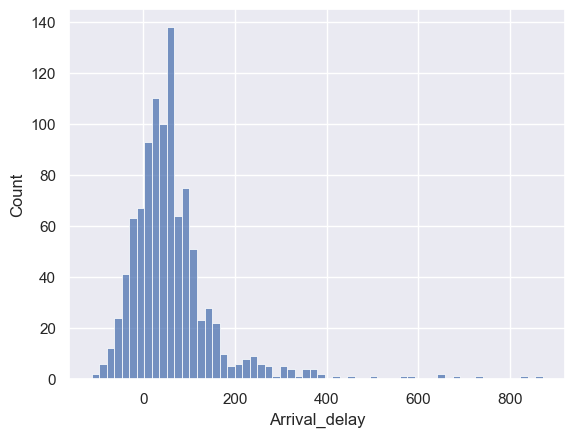

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style of the plots using Seaborn.
sns.set()

# Create a histogram plot of the 'Arrival_delay' column from the DataFrame 'df'.
sns.histplot(x=df['Arrival_delay'])


Find out how much influence input variables such as "Upstream_stop_delay" and "Dwell_time" have on the values in the "Arrival_delay" column.

In [7]:
# Calculate the correlation matrix for all columns in the DataFrame 'df'.
corr_matrix = df.corr()
# Sort the correlations between the 'Arrival_delay' column and other columns in descending order.
# This shows the correlation coefficients for each column with respect to 'Arrival_delay'.
correlations_with_arrival_delay = corr_matrix['Arrival_delay'].sort_values(ascending=False)

Feature engineering visually explore and understand the relationships between different features (variables) in a dataset. Seaborn pair plots help identify patterns, correlations, and potential outliers, aiding in the selection and transformation of features to improve model performance. It is a crucial step in data preprocessing to enhance the accuracy and effectiveness of machine learning models.​

/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

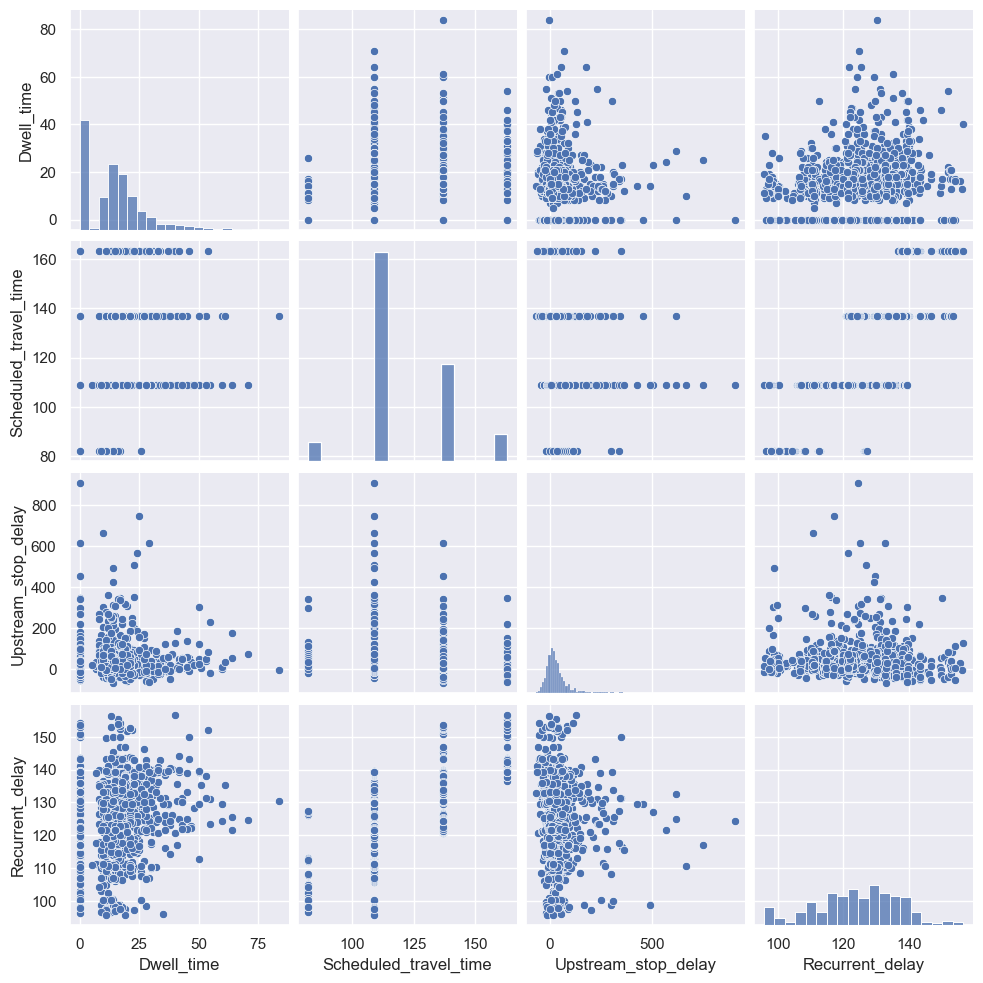

In [8]:
# Create a DataFrame 'x' containing all columns except 'Arrival_delay'.
x = df.drop(['Arrival_delay'], axis=1)
# Create a Series 'y' containing only the 'Arrival_delay' column.
y = df['Arrival_delay']
# Use Seaborn's pairplot to visualize pairwise relationships between the features in 'x'.
sns.pairplot(x)

## Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the neural network model with the training dataset and predict the values for the test dataset.

Epoch 1/200
20/20 [==============================] - 0s 4ms/step - loss: 46.5335 - mae: 46.5335 - val_loss: 36.3169 - val_mae: 36.3169
Epoch 2/200
20/20 [==============================] - 0s 1ms/step - loss: 35.5615 - mae: 35.5615 - val_loss: 32.7564 - val_mae: 32.7564
Epoch 3/200
20/20 [==============================] - 0s 1ms/step - loss: 31.7145 - mae: 31.7145 - val_loss: 35.2370 - val_mae: 35.2370
Epoch 4/200
20/20 [==============================] - 0s 973us/step - loss: 31.0550 - mae: 31.0550 - val_loss: 33.4666 - val_mae: 33.4666
Epoch 5/200
20/20 [==============================] - 0s 1ms/step - loss: 30.9743 - mae: 30.9743 - val_loss: 33.1028 - val_mae: 33.1028
Epoch 6/200
20/20 [==============================] - 0s 985us/step - loss: 30.5650 - mae: 30.5650 - val_loss: 32.5374 - val_mae: 32.5374
Epoch 7/200
20/20 [==============================] - 0s 965us/step - loss: 30.5016 - mae: 30.5016 - val_loss: 32.4945 - val_mae: 32.4945
Epoch 8/200
20/20 [==============================

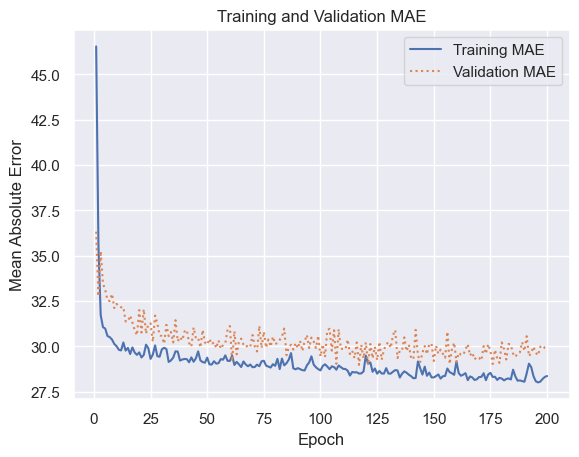

In [11]:
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets, with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae = mean_absolute_error(y_test, y_pred)
# Calculate the Mean Squared Error (MSE) between the true and predicted values.
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2 = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.722328186035156
Mean Squared Error: 1411.8074951171875
R-squared: 0.8803349137306213


## Visualize the Results
we create a "Actual vs. Predicted Values" graph to give a visual inspection of the prediction quality.

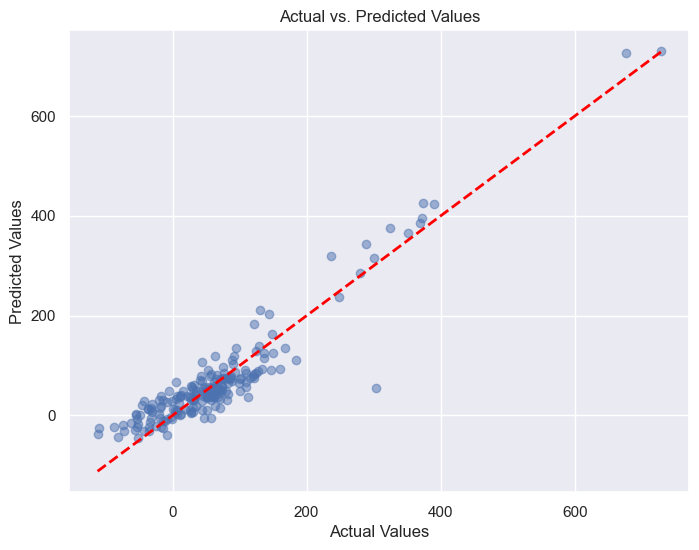

In [13]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

# **Task 2: Practical NN training techniques**
The task will illustrate some useful NN training techniques, including saving and loading the trained model, using the callback function to save the best model, and adding dropout layers.



Epoch 1: val_mae improved from inf to 48.18644, saving model to weights.best.h5

Epoch 2: val_mae improved from 48.18644 to 38.66588, saving model to weights.best.h5

Epoch 3: val_mae improved from 38.66588 to 31.97630, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 31.97630

Epoch 5: val_mae did not improve from 31.97630

Epoch 6: val_mae improved from 31.97630 to 31.92289, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 31.92289

Epoch 8: val_mae improved from 31.92289 to 31.73490, saving model to weights.best.h5

Epoch 9: val_mae improved from 31.73490 to 31.23880, saving model to weights.best.h5


/Users/sebastienlemasne/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 10: val_mae did not improve from 31.23880

Epoch 11: val_mae did not improve from 31.23880

Epoch 12: val_mae did not improve from 31.23880

Epoch 13: val_mae improved from 31.23880 to 31.01893, saving model to weights.best.h5

Epoch 14: val_mae did not improve from 31.01893

Epoch 15: val_mae improved from 31.01893 to 30.91953, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 30.91953

Epoch 17: val_mae improved from 30.91953 to 30.82615, saving model to weights.best.h5

Epoch 18: val_mae did not improve from 30.82615

Epoch 19: val_mae did not improve from 30.82615

Epoch 20: val_mae improved from 30.82615 to 30.62459, saving model to weights.best.h5

Epoch 21: val_mae did not improve from 30.62459

Epoch 22: val_mae did not improve from 30.62459

Epoch 23: val_mae improved from 30.62459 to 30.61777, saving model to weights.best.h5

Epoch 24: val_mae did not improve from 30.61777

Epoch 25: val_mae did not improve from 30.61777

Epoch 26: val_mae did not

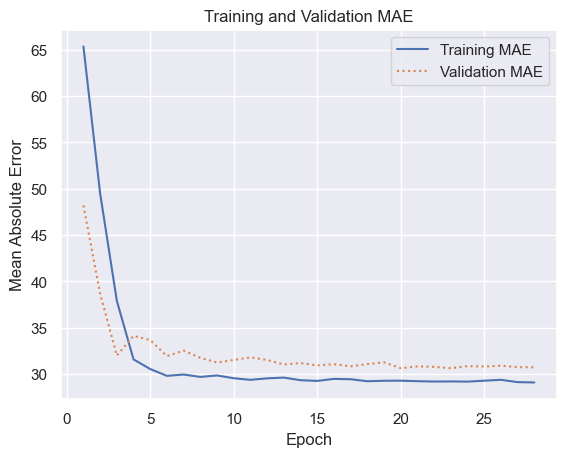

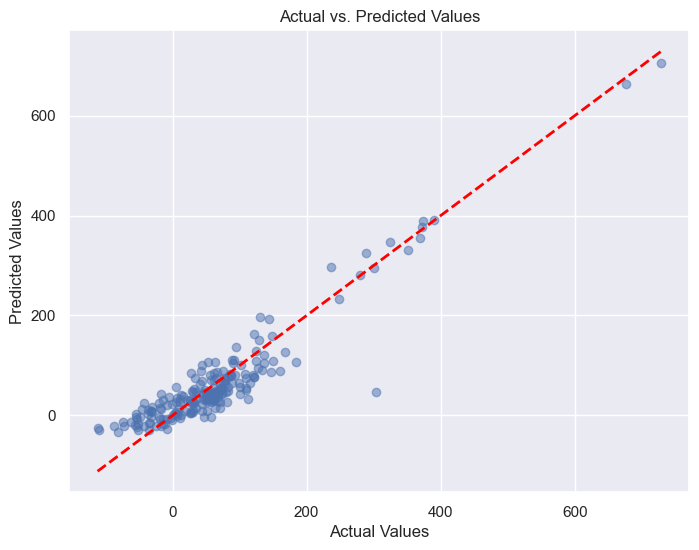

In [14]:
from json import load
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can choose to add the dropout layer or not***************************

def construct_network_model():
  # Create a Sequential model, which is a linear stack of layers.
  model = Sequential()

  # Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
  model.add(Dense(32, activation='relu', input_dim=4))

  # # Add a Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add another Dense layer with 64 units and ReLU activation.
  model.add(Dense(64, activation='relu'))

  # # Add another Dropout layer with a dropout rate of 0.5.
  # model.add(Dropout(0.5))

  # Add a final Dense layer with 1 unit (typically used for regression tasks).
  model.add(Dense(1))
  return model

model=construct_network_model()
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can choose to add the dropout layer or not*****************


#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can choose to use the callback function or not**************
# Do not use the callback function
# hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32)

# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save thhe model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function or not*************

#-------------------------------------------------model evaluation--------------------------------------------------------------------

# Set the style of the plots using Seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the trained model'+"---------------------------------------------")
# Print the calculated metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#-------------------------------------------------load model and evaluation--------------------------------------------------------------------
if not filepath =="":
  # Load a pre-trained model from the specified file path.
  model = load_model(filepath)

  # Use the loaded model to predict on the test data.
  y_pred = model.predict(X_test)

  # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('--------------------------------------'+'this is result of the model loaded from the local path'+"---------------------------------------------")

  # Print the calculated metrics.
  print(f"Mean Absolute Error: {mae}")
  print(f"Mean Squared Error: {mse}")
  print(f"R-squared: {r2}")



  # Create a scatter plot to visualize the relationship
  plt.figure(figsize=(8, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

  # Add labels and title
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs. Predicted Values")

  # Add a diagonal line for reference (perfect predictions)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

  # Show the plot
  plt.show()


# **Task 3: Compare the results with a linear regression model**
The task involves comparing the results obtained from the neural network with those from the linear regression model, and we should analyze the reasons behind any differences in the outcomes.

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
#df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Mean Squared Error of linear model: {mse_linear}")
print(f"R-squared of linear model: {r2_linear}")




Epoch 1: val_mae improved from inf to 30.29232, saving model to weights.best.h5

Epoch 2: val_mae improved from 30.29232 to 27.58427, saving model to weights.best.h5

Epoch 3: val_mae did not improve from 27.58427



Epoch 4: val_mae improved from 27.58427 to 25.73906, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 25.73906

Epoch 6: val_mae did not improve from 25.73906

Epoch 7: val_mae improved from 25.73906 to 25.58175, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 25.58175

Epoch 9: val_mae did not improve from 25.58175

Epoch 10: val_mae did not improve from 25.58175

Epoch 11: val_mae did not improve from 25.58175

Epoch 12: val_mae improved from 25.58175 to 25.37944, saving model to weights.best.h5

Epoch 13: val_mae did not improve from 25.37944

Epoch 14: val_mae did not improve from 25.37944

Epoch 15: val_mae did not improve from 25.37944

Epoch 16: val_mae did not improve from 25.37944

Epoch 17: val_mae did not improve from 25.37944
32/32 [==============================] - 0s 432us/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.0

**In general, deep learning models tend to outperform linear regression models. Why is the performance of the neural network worse than that of the linear regression model?**

# **Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)**
Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.


Epoch 1: val_mae improved from inf to 32.48951, saving model to weights.best.h5

Epoch 2: val_mae improved from 32.48951 to 26.40898, saving model to weights.best.h5

Epoch 3: val_mae improved from 26.40898 to 26.24113, saving model to weights.best.h5



Epoch 4: val_mae improved from 26.24113 to 25.87467, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 25.87467

Epoch 6: val_mae improved from 25.87467 to 25.83904, saving model to weights.best.h5

Epoch 7: val_mae improved from 25.83904 to 25.39498, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 25.39498

Epoch 9: val_mae did not improve from 25.39498

Epoch 10: val_mae did not improve from 25.39498

Epoch 11: val_mae improved from 25.39498 to 25.29202, saving model to weights.best.h5

Epoch 12: val_mae did not improve from 25.29202

Epoch 13: val_mae did not improve from 25.29202

Epoch 14: val_mae improved from 25.29202 to 25.27248, saving model to weights.best.h5

Epoch 15: val_mae did not improve from 25.27248

Epoch 16: val_mae did not improve from 25.27248

Epoch 17: val_mae did not improve from 25.27248

Epoch 18: val_mae did not improve from 25.27248

Epoch 19: val_mae did not improve from 25.27248
32/32 [=========================

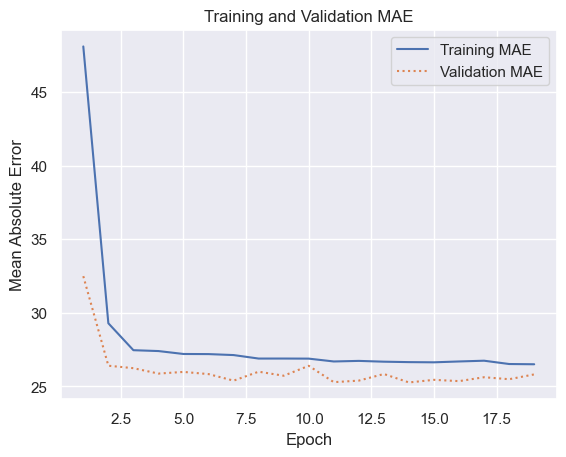

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
#df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h5"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.optimizers (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.optimizers
Note: you may need to restart the kernel to use updated packages.


In [200]:
from tensorflow.keras import regularizers
from keras.optimizers import Adam

## Create a function to build a neural network model with customizable parameters

def build_model(n_layers, n_neurons, learning_rate, dropout_rate, l, input_dim=4):
    #-------------------------------------------------network construction------------------------------------------------------------------

    #************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
    # Create a Sequential model, which is a linear stack of layers.
    model = Sequential()
    for i in range(n_layers):
        if i==0:
            # Add a Dense layer with n_neurons units, ReLU activation, and an input dimension of 4.
            model.add(Dense(n_neurons[0], activation='relu', input_dim=input_dim, kernel_regularizer=regularizers.l2(l)))
        else:
            # Add another Dense layer with n_neurons units and ReLU activation.
            model.add(Dense(n_neurons[i], activation='relu', kernel_regularizer=regularizers.l2(l)))
        if dropout_rate>0:
            model.add(Dropout(dropout_rate))
    # Add a final Dense layer with 1 unit (typically used for regression tasks).
    model.add(Dense(1))


    # Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
    # and MAE metric to be used during training.
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mae', metrics=['mae'])
    #************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************
    return model

def build_and_train_model(n_layers, n_neurons, learning_rate, patience, dropout_rate, l, min_lr, X_train, y_train, X_test, y_test, input_dim=4):
    model=build_model(n_layers, n_neurons, learning_rate, dropout_rate, l, input_dim)
    #-------------------------------------------------model train------------------------------------------------------------------
    #************************************************Here you can use the callback function **************
    # use the callback function to early stop, learning rate ajusting, save the best model
    # Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
    # It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
    early_stop = EarlyStopping(monitor='val_mae', patience=patience, restore_best_weights=True)

    # Create a ReduceLROnPlateau callback to monitor val_mae.
    # It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=patience//2, verbose=1, min_lr=min_lr)

    # Define the file path where the best model weights will be saved.
    filepath = "weights.best.h5"
    # Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
    # The callback will save the model's weights only if the validation mae improves.
    checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

    # Train the model using the fit method.
    hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr],verbose=0) #,checkpoint

    #************************************************Here you can choose to use the callback function *************

    # Set the style of the plots using seaborn.
    sns.set()

    # Extract the training and validation Mean Absolute Error (MAE) from the training history.
    err = hist.history['mae']
    val_err = hist.history['val_mae']

    # Define the number of epochs.
    epochs = range(1, len(err) + 1)

    # Plot the Training MAE and Validation MAE over epochs.
    plt.plot(epochs, err, '-', label='Training MAE')
    plt.plot(epochs, val_err, ':', label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.plot()

    # Use the trained model to predict on the test data.
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics.
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    return model, mae, mse, r2

    

## Model 1 :  Simpler network


Epoch 1: val_mae improved from inf to 29.28650, saving model to weights.best.h5

Epoch 2: val_mae improved from 29.28650 to 27.93909, saving model to weights.best.h5

Epoch 3: val_mae improved from 27.93909 to 25.70485, saving model to weights.best.h5

Epoch 4: val_mae did not improve from 25.70485



Epoch 5: val_mae did not improve from 25.70485

Epoch 6: val_mae did not improve from 25.70485

Epoch 7: val_mae did not improve from 25.70485

Epoch 8: val_mae did not improve from 25.70485

Epoch 9: val_mae did not improve from 25.70485

Epoch 10: val_mae did not improve from 25.70485

Epoch 11: val_mae did not improve from 25.70485

Epoch 12: val_mae improved from 25.70485 to 25.69063, saving model to weights.best.h5

Epoch 13: val_mae did not improve from 25.69063

Epoch 14: val_mae did not improve from 25.69063

Epoch 15: val_mae improved from 25.69063 to 25.32991, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 25.32991

Epoch 17: val_mae did not improve from 25.32991

Epoch 18: val_mae did not improve from 25.32991

Epoch 19: val_mae improved from 25.32991 to 25.27617, saving model to weights.best.h5

Epoch 20: val_mae did not improve from 25.27617

Epoch 21: val_mae did not improve from 25.27617

Epoch 22: val_mae did not improve from 25.27617

Epoch 23

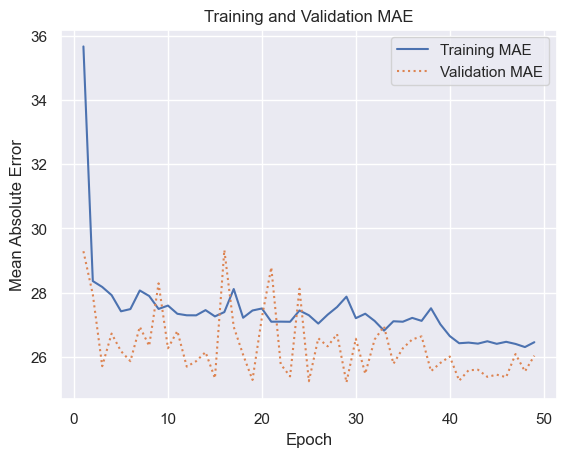

In [176]:
build_and_train_model(n_layers=2, n_neurons=[32, 16], learning_rate=0.01, patience=20, dropout_rate=0, l=0, min_lr=1e-6, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Model 2 : 


Epoch 1: val_mae improved from inf to 33.43713, saving model to weights.best.h5

Epoch 2: val_mae improved from 33.43713 to 28.91684, saving model to weights.best.h5



Epoch 3: val_mae did not improve from 28.91684

Epoch 4: val_mae improved from 28.91684 to 27.26698, saving model to weights.best.h5

Epoch 5: val_mae did not improve from 27.26698

Epoch 6: val_mae did not improve from 27.26698

Epoch 7: val_mae did not improve from 27.26698

Epoch 8: val_mae improved from 27.26698 to 27.22467, saving model to weights.best.h5

Epoch 9: val_mae improved from 27.22467 to 25.80701, saving model to weights.best.h5

Epoch 10: val_mae did not improve from 25.80701

Epoch 11: val_mae did not improve from 25.80701

Epoch 12: val_mae did not improve from 25.80701

Epoch 13: val_mae did not improve from 25.80701

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 14: val_mae did not improve from 25.80701

Epoch 15: val_mae did not improve from 25.80701

Epoch 16: val_mae improved from 25.80701 to 25.37526, saving model to weights.best.h5

Epoch 17: val_mae did not improve from 25.37526

Epoch 18: val_mae did not improve from 25

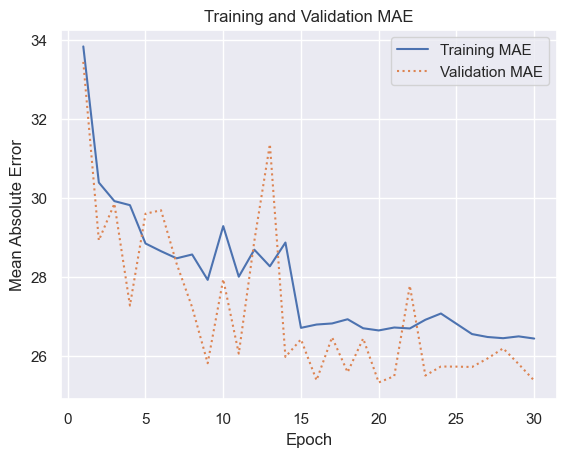

In [181]:
build_and_train_model(n_layers=3, n_neurons=[128, 128, 64], learning_rate=0.01, patience=10, dropout_rate=0, l=0.001, min_lr=1e-6, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Additional data preprocessing 

In [182]:
# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
#df = df.iloc[:1000]
df = df.dropna()

df['Arrival_time'] = pd.to_datetime(df['Arrival_time'], dayfirst=True)
df['wd'] = df['Arrival_time'].dt.dayofweek
df['hr'] = df['Arrival_time'].dt.hour

loc = Point(59.3293, 18.0686) # Stockholm
# Localize to UTC and floor to hour (keep as UTC, tz-aware)
df['utc_hour'] = df['Arrival_time'].dt.tz_localize('UTC').dt.floor('h')
# Remove timezone info for Meteostat API and merging (make tz-naive, in UTC)
df['utc_hour_naive'] = df['utc_hour'].dt.tz_convert(None)
start, end = df['utc_hour_naive'].min(), df['utc_hour_naive'].max()
wx = Hourly(loc, start, end).fetch().reset_index()  # columns include 'time','prcp','snow','coco','temp'


if wx['time'].dt.tz is not None:
    wx['time'] = wx['time'].dt.tz_convert(None)

# Join temperature
df = df.merge(wx[['time','temp','prcp','snow','coco']], left_on='utc_hour_naive', right_on='time', how='left').drop(columns=['time'])


# Map to weathersit categories
def to_weathersit(r):
    prcp = (r['prcp'] or 0) if pd.notnull(r['prcp']) else 0
    snow = (r['snow'] or 0) if pd.notnull(r['snow']) else 0
    coco = r['coco'] if pd.notnull(r['coco']) else None
    if prcp >= 2 or snow >= 2: return 4  # heavy
    if prcp > 0 or snow > 0:   return 3  # light
    if coco in {2,3,5,10,11}:  return 2  # mist/cloudy
    return 1  # clear
df['weather'] = df.apply(to_weathersit, axis=1)

# Add interaction features

df['hr_wd'] = df['hr'] * 10 + df['wd']
df['hr_wd_weather'] = df['hr'] * 100
df['hr_wd_weather'] = df['hr_wd_weather'] + df['wd'] * 10 + df['weather']
df['temp_wd'] = df['temp'] * 10 + df['wd']
df['temp_hr'] = df['temp'] * 10 + df['hr']



# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id', 'utc_hour', 'utc_hour_naive', 'snow' ], axis=1)
df = df.astype(np.float32)
df = df.dropna()

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)





## Model 3 : Simple network with additional data


Epoch 1: val_mae improved from inf to 62.68777, saving model to weights.best.h5

Epoch 2: val_mae improved from 62.68777 to 42.14523, saving model to weights.best.h5

Epoch 3: val_mae improved from 42.14523 to 33.59580, saving model to weights.best.h5

Epoch 4: val_mae improved from 33.59580 to 32.86366, saving model to weights.best.h5



Epoch 5: val_mae improved from 32.86366 to 30.10222, saving model to weights.best.h5

Epoch 6: val_mae improved from 30.10222 to 29.61847, saving model to weights.best.h5

Epoch 7: val_mae improved from 29.61847 to 29.31030, saving model to weights.best.h5

Epoch 8: val_mae did not improve from 29.31030

Epoch 9: val_mae did not improve from 29.31030

Epoch 10: val_mae improved from 29.31030 to 27.86436, saving model to weights.best.h5

Epoch 11: val_mae improved from 27.86436 to 27.77005, saving model to weights.best.h5

Epoch 12: val_mae improved from 27.77005 to 27.56232, saving model to weights.best.h5

Epoch 13: val_mae did not improve from 27.56232

Epoch 14: val_mae improved from 27.56232 to 27.10142, saving model to weights.best.h5

Epoch 15: val_mae improved from 27.10142 to 26.94619, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 26.94619

Epoch 17: val_mae improved from 26.94619 to 26.92665, saving model to weights.best.h5

Epoch 18: val_mae improve

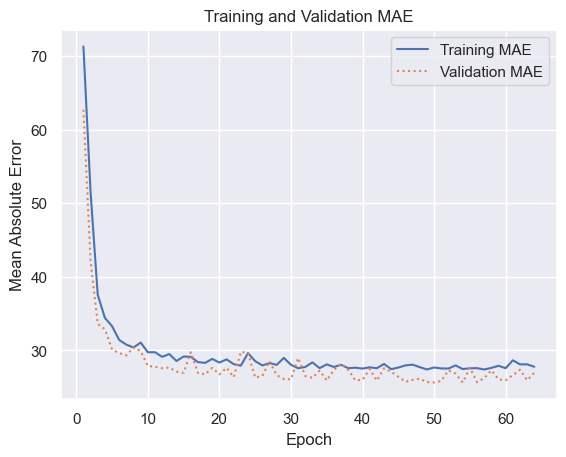

In [189]:
build_and_train_model(n_layers=2, n_neurons=[32, 16], learning_rate=0.001, patience=10, dropout_rate=0, l=0.001, min_lr=1e-3, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, input_dim=X_train.shape[1])

## Model 4 : More complex model with additional data


Epoch 1: val_mae improved from inf to 45.86902, saving model to weights.best.h5

Epoch 2: val_mae improved from 45.86902 to 28.85953, saving model to weights.best.h5

Epoch 3: val_mae improved from 28.85953 to 27.31159, saving model to weights.best.h5



Epoch 4: val_mae improved from 27.31159 to 27.18993, saving model to weights.best.h5

Epoch 5: val_mae improved from 27.18993 to 26.41509, saving model to weights.best.h5

Epoch 6: val_mae improved from 26.41509 to 25.64715, saving model to weights.best.h5

Epoch 7: val_mae did not improve from 25.64715

Epoch 8: val_mae improved from 25.64715 to 25.53557, saving model to weights.best.h5

Epoch 9: val_mae improved from 25.53557 to 25.44915, saving model to weights.best.h5

Epoch 10: val_mae improved from 25.44915 to 25.28151, saving model to weights.best.h5

Epoch 11: val_mae did not improve from 25.28151

Epoch 12: val_mae did not improve from 25.28151

Epoch 13: val_mae did not improve from 25.28151

Epoch 14: val_mae did not improve from 25.28151

Epoch 15: val_mae improved from 25.28151 to 25.11127, saving model to weights.best.h5

Epoch 16: val_mae did not improve from 25.11127

Epoch 17: val_mae did not improve from 25.11127

Epoch 18: val_mae did not improve from 25.11127

Epoc

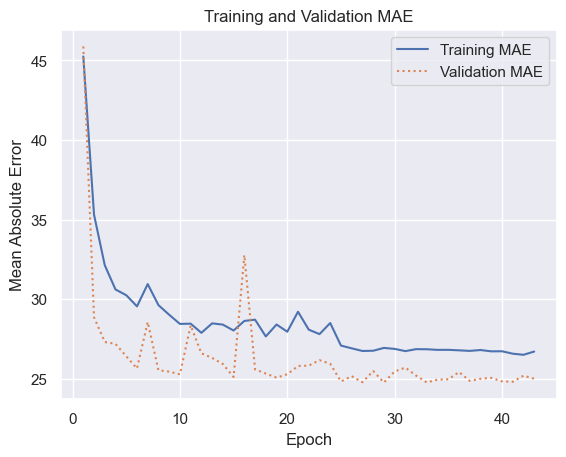

In [193]:
build_and_train_model(n_layers=4, n_neurons=[128, 128, 128, 64], learning_rate=0.001, patience=10, dropout_rate=0, l=0.001, min_lr=1e-4, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, input_dim=X_train.shape[1])

## Grid Search CV 

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}



Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 466us/step


Mean Absolute Error: 26.979286193847656
Mean Squared Error: 1233.6546630859375
R-squared: 0.9245451092720032
Results - MAE: 26.979286193847656, MSE: 1233.6546630859375, R2: 0.9245451092720032

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 39: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 44: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.
31/31 [==============================] - 0s 420us/step


Mean Absolute Error: 26.93729019165039
Mean Squared Error: 1241.3974609375
R-squared: 0.9240715503692627
Results - MAE: 26.93729019165039, MSE: 1241.3974609375, R2: 0.9240715503692627

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 421us/step


Mean Absolute Error: 27.22270393371582
Mean Squared Error: 1248.263671875
R-squared: 0.9236515760421753
Results - MAE: 27.22270393371582, MSE: 1248.263671875, R2: 0.9236515760421753

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 39: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 44: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.
31/31 [==============================] - 0s 355us/step


Mean Absolute Error: 27.14024543762207
Mean Squared Error: 1244.1512451171875
R-squared: 0.9239031076431274
Results - MAE: 27.14024543762207, MSE: 1244.1512451171875, R2: 0.9239031076431274

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 534us/step


Mean Absolute Error: 28.53207778930664
Mean Squared Error: 1444.671630859375
R-squared: 0.9116385579109192
Results - MAE: 28.53207778930664, MSE: 1444.671630859375, R2: 0.9116385579109192

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 29: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 30.151796340942383
Mean Squared Error: 1624.0001220703125
R-squared: 0.9006701707839966
Results - MAE: 30.151796340942383, MSE: 1624.0001220703125, R2: 0.9006701707839966

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 340us/step


Mean Absolute Error: 32.550048828125
Mean Squared Error: 1867.1341552734375
R-squared: 0.8857991695404053
Results - MAE: 32.550048828125, MSE: 1867.1341552734375, R2: 0.8857991695404053

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 328us/step


Mean Absolute Error: 29.59097671508789
Mean Squared Error: 1386.2559814453125
R-squared: 0.9152114987373352
Results - MAE: 29.59097671508789, MSE: 1386.2559814453125, R2: 0.9152114987373352

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 57: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 394us/step


Mean Absolute Error: 27.2762451171875
Mean Squared Error: 1252.4173583984375
R-squared: 0.9233975410461426
Results - MAE: 27.2762451171875, MSE: 1252.4173583984375, R2: 0.9233975410461426

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 59: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 79: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.

Epoch 89: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-06.
31/31 [==============================] - 0s 374us/step


Mean Absolute Error: 27.0667781829834
Mean Squared Error: 1246.5791015625
R-squared: 0.9237546324729919
Results - MAE: 27.0667781829834, MSE: 1246.5791015625, R2: 0.9237546324729919

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 53: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 72: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 82: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 330us/step


Mean Absolute Error: 27.149181365966797
Mean Squared Error: 1247.2882080078125
R-squared: 0.9237112402915955
Results - MAE: 27.149181365966797, MSE: 1247.2882080078125, R2: 0.9237112402915955

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 59: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 291us/step


Mean Absolute Error: 27.016448974609375
Mean Squared Error: 1238.5885009765625
R-squared: 0.9242433309555054
Results - MAE: 27.016448974609375, MSE: 1238.5885009765625, R2: 0.9242433309555054

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 308us/step


Mean Absolute Error: 28.626338958740234
Mean Squared Error: 1340.493896484375
R-squared: 0.9180104732513428
Results - MAE: 28.626338958740234, MSE: 1340.493896484375, R2: 0.9180104732513428

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 40: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 306us/step


Mean Absolute Error: 30.765796661376953
Mean Squared Error: 1787.4324951171875
R-squared: 0.8906740546226501
Results - MAE: 30.765796661376953, MSE: 1787.4324951171875, R2: 0.8906740546226501

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 314us/step


Mean Absolute Error: 27.653179168701172
Mean Squared Error: 1329.95361328125
R-squared: 0.9186551570892334
Results - MAE: 27.653179168701172, MSE: 1329.95361328125, R2: 0.9186551570892334

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 312us/step
Mean Absolute Error: 28.189985275268555
Mean Squared Error: 1317.8663330078125
R-squared: 0.9193944334983826
Results - MAE: 28.189985275268555, MSE: 1317.8663330078125, R2: 0.9193944334983826

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}



Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 313us/step


Mean Absolute Error: 26.821510314941406
Mean Squared Error: 1226.37451171875
R-squared: 0.9249904155731201
Results - MAE: 26.821510314941406, MSE: 1226.37451171875, R2: 0.9249904155731201

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 37: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 42: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 310us/step


Mean Absolute Error: 27.052715301513672
Mean Squared Error: 1239.7860107421875
R-squared: 0.9241701364517212
Results - MAE: 27.052715301513672, MSE: 1239.7860107421875, R2: 0.9241701364517212

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 316us/step


Mean Absolute Error: 26.963848114013672
Mean Squared Error: 1226.47802734375
R-squared: 0.9249840974807739
Results - MAE: 26.963848114013672, MSE: 1226.47802734375, R2: 0.9249840974807739

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 37: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 42: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 337us/step
Mean Absolute Error: 27.266956329345703
Mean Squared Error: 1290.7933349609375
R-squared: 0.9210503101348877
Results - MAE: 27.266956329345703, MSE: 1290.7933349609375, R2: 0.9210503101348877

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}



Epoch 36: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 28.55223846435547
Mean Squared Error: 1424.66796875
R-squared: 0.9128620624542236
Results - MAE: 28.55223846435547, MSE: 1424.66796875, R2: 0.9128620624542236

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 42: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
31/31 [==============================] - 0s 321us/step


Mean Absolute Error: 28.497560501098633
Mean Squared Error: 1398.98046875
R-squared: 0.9144331812858582
Results - MAE: 28.497560501098633, MSE: 1398.98046875, R2: 0.9144331812858582

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 296us/step


Mean Absolute Error: 31.69863510131836
Mean Squared Error: 1796.0762939453125
R-squared: 0.8901453614234924
Results - MAE: 31.69863510131836, MSE: 1796.0762939453125, R2: 0.8901453614234924

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 28: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 33: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 294us/step


Mean Absolute Error: 29.39460563659668
Mean Squared Error: 1514.3909912109375
R-squared: 0.9073742628097534
Results - MAE: 29.39460563659668, MSE: 1514.3909912109375, R2: 0.9073742628097534

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 81: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 316us/step


Mean Absolute Error: 26.91895866394043
Mean Squared Error: 1238.4473876953125
R-squared: 0.9242519736289978
Results - MAE: 26.91895866394043, MSE: 1238.4473876953125, R2: 0.9242519736289978

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 57: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 75: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 115: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 125: ReduceLROnPlateau reducing learning rate to 1e-06.
31/31 [==============================] - 0s 324us/step


Mean Absolute Error: 26.959152221679688
Mean Squared Error: 1227.1817626953125
R-squared: 0.9249410629272461
Results - MAE: 26.959152221679688, MSE: 1227.1817626953125, R2: 0.9249410629272461

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 50: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 297us/step


Mean Absolute Error: 27.354087829589844
Mean Squared Error: 1258.08447265625
R-squared: 0.9230509400367737
Results - MAE: 27.354087829589844, MSE: 1258.08447265625, R2: 0.9230509400367737

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 74: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 84: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 308us/step


Mean Absolute Error: 26.958065032958984
Mean Squared Error: 1220.3519287109375
R-squared: 0.925358772277832
Results - MAE: 26.958065032958984, MSE: 1220.3519287109375, R2: 0.925358772277832

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 42: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 52: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 303us/step


Mean Absolute Error: 27.95806121826172
Mean Squared Error: 1334.808837890625
R-squared: 0.9183581471443176
Results - MAE: 27.95806121826172, MSE: 1334.808837890625, R2: 0.9183581471443176

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 48: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 58: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
31/31 [==============================] - 0s 349us/step


Mean Absolute Error: 28.653125762939453
Mean Squared Error: 1422.1153564453125
R-squared: 0.9130181670188904
Results - MAE: 28.653125762939453, MSE: 1422.1153564453125, R2: 0.9130181670188904

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 49: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 314us/step


Mean Absolute Error: 28.051429748535156
Mean Squared Error: 1342.644775390625
R-squared: 0.9178788661956787
Results - MAE: 28.051429748535156, MSE: 1342.644775390625, R2: 0.9178788661956787

Training with parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 42: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
31/31 [==============================] - 0s 376us/step


Mean Absolute Error: 28.199426651000977
Mean Squared Error: 1354.926513671875
R-squared: 0.9171277284622192
Results - MAE: 28.199426651000977, MSE: 1354.926513671875, R2: 0.9171277284622192

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 449us/step


Mean Absolute Error: 27.116924285888672
Mean Squared Error: 1248.6123046875
R-squared: 0.9236302375793457
Results - MAE: 27.116924285888672, MSE: 1248.6123046875, R2: 0.9236302375793457

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 29: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 335us/step


Mean Absolute Error: 27.266437530517578
Mean Squared Error: 1273.1982421875
R-squared: 0.9221264719963074
Results - MAE: 27.266437530517578, MSE: 1273.1982421875, R2: 0.9221264719963074

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 321us/step


Mean Absolute Error: 27.120018005371094
Mean Squared Error: 1235.4693603515625
R-squared: 0.9244341254234314
Results - MAE: 27.120018005371094, MSE: 1235.4693603515625, R2: 0.9244341254234314

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 31: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 292us/step


Mean Absolute Error: 27.388959884643555
Mean Squared Error: 1302.4908447265625
R-squared: 0.9203348755836487
Results - MAE: 27.388959884643555, MSE: 1302.4908447265625, R2: 0.9203348755836487

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 307us/step


Mean Absolute Error: 30.501544952392578
Mean Squared Error: 1566.60498046875
R-squared: 0.904180645942688
Results - MAE: 30.501544952392578, MSE: 1566.60498046875, R2: 0.904180645942688

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 24: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 319us/step


Mean Absolute Error: 28.068391799926758
Mean Squared Error: 1347.551513671875
R-squared: 0.9175787568092346
Results - MAE: 28.068391799926758, MSE: 1347.551513671875, R2: 0.9175787568092346

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 308us/step


Mean Absolute Error: 28.647737503051758
Mean Squared Error: 1384.9798583984375
R-squared: 0.9152895212173462
Results - MAE: 28.647737503051758, MSE: 1384.9798583984375, R2: 0.9152895212173462

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 306us/step


Mean Absolute Error: 27.98859214782715
Mean Squared Error: 1283.3045654296875
R-squared: 0.9215083718299866
Results - MAE: 27.98859214782715, MSE: 1283.3045654296875, R2: 0.9215083718299866

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 27.112529754638672
Mean Squared Error: 1247.314208984375
R-squared: 0.9237096905708313
Results - MAE: 27.112529754638672, MSE: 1247.314208984375, R2: 0.9237096905708313

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 33: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 46: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 56: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.
31/31 [==============================] - 0s 299us/step


Mean Absolute Error: 27.022506713867188
Mean Squared Error: 1242.5750732421875
R-squared: 0.923999547958374
Results - MAE: 27.022506713867188, MSE: 1242.5750732421875, R2: 0.923999547958374

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 294us/step


Mean Absolute Error: 27.25305938720703
Mean Squared Error: 1278.39990234375
R-squared: 0.9218083620071411
Results - MAE: 27.25305938720703, MSE: 1278.39990234375, R2: 0.9218083620071411

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 61: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 310us/step


Mean Absolute Error: 27.233360290527344
Mean Squared Error: 1245.4957275390625
R-squared: 0.9238209128379822
Results - MAE: 27.233360290527344, MSE: 1245.4957275390625, R2: 0.9238209128379822

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 55: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 296us/step


Mean Absolute Error: 27.250566482543945
Mean Squared Error: 1265.709228515625
R-squared: 0.9225845336914062
Results - MAE: 27.250566482543945, MSE: 1265.709228515625, R2: 0.9225845336914062

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 403us/step


Mean Absolute Error: 28.363994598388672
Mean Squared Error: 1324.0615234375
R-squared: 0.9190155267715454
Results - MAE: 28.363994598388672, MSE: 1324.0615234375, R2: 0.9190155267715454

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 19: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 290us/step


Mean Absolute Error: 27.86103057861328
Mean Squared Error: 1293.4664306640625
R-squared: 0.9208868145942688
Results - MAE: 27.86103057861328, MSE: 1293.4664306640625, R2: 0.9208868145942688

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 307us/step


Mean Absolute Error: 29.968889236450195
Mean Squared Error: 1527.4444580078125
R-squared: 0.9065758585929871
Results - MAE: 29.968889236450195, MSE: 1527.4444580078125, R2: 0.9065758585929871

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 26.946985244750977
Mean Squared Error: 1224.8594970703125
R-squared: 0.9250830411911011
Results - MAE: 26.946985244750977, MSE: 1224.8594970703125, R2: 0.9250830411911011

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 35: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 318us/step


Mean Absolute Error: 27.261310577392578
Mean Squared Error: 1274.3486328125
R-squared: 0.9220561385154724
Results - MAE: 27.261310577392578, MSE: 1274.3486328125, R2: 0.9220561385154724

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 363us/step


Mean Absolute Error: 27.07244873046875
Mean Squared Error: 1251.1884765625
R-squared: 0.9234727025032043
Results - MAE: 27.07244873046875, MSE: 1251.1884765625, R2: 0.9234727025032043

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 27: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 48: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 53: ReduceLROnPlateau reducing learning rate to 1e-06.
31/31 [==============================] - 0s 512us/step


Mean Absolute Error: 26.938106536865234
Mean Squared Error: 1226.3702392578125
R-squared: 0.9249906539916992
Results - MAE: 26.938106536865234, MSE: 1226.3702392578125, R2: 0.9249906539916992

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 32: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 1ms/step


Mean Absolute Error: 27.17539405822754
Mean Squared Error: 1252.216796875
R-squared: 0.9234098196029663
Results - MAE: 27.17539405822754, MSE: 1252.216796875, R2: 0.9234098196029663

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 38: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 43: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 307us/step


Mean Absolute Error: 27.683364868164062
Mean Squared Error: 1274.883544921875
R-squared: 0.9220234155654907
Results - MAE: 27.683364868164062, MSE: 1274.883544921875, R2: 0.9220234155654907

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 683us/step


Mean Absolute Error: 27.355453491210938
Mean Squared Error: 1277.616943359375
R-squared: 0.9218562245368958
Results - MAE: 27.355453491210938, MSE: 1277.616943359375, R2: 0.9218562245368958

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 31: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 46: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 27.71295738220215
Mean Squared Error: 1291.3231201171875
R-squared: 0.9210178852081299
Results - MAE: 27.71295738220215, MSE: 1291.3231201171875, R2: 0.9210178852081299

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 40: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 376us/step


Mean Absolute Error: 27.24671745300293
Mean Squared Error: 1254.7784423828125
R-squared: 0.9232531189918518
Results - MAE: 27.24671745300293, MSE: 1254.7784423828125, R2: 0.9232531189918518

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 62: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 74: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 84: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 305us/step


Mean Absolute Error: 27.004314422607422
Mean Squared Error: 1218.6929931640625
R-squared: 0.9254602193832397
Results - MAE: 27.004314422607422, MSE: 1218.6929931640625, R2: 0.9254602193832397

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 60: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 78: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 345us/step


Mean Absolute Error: 27.12478256225586
Mean Squared Error: 1239.7294921875
R-squared: 0.9241735935211182
Results - MAE: 27.12478256225586, MSE: 1239.7294921875, R2: 0.9241735935211182

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 38: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 81: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 91: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 360us/step


Mean Absolute Error: 27.06179428100586
Mean Squared Error: 1250.4287109375
R-squared: 0.9235191345214844
Results - MAE: 27.06179428100586, MSE: 1250.4287109375, R2: 0.9235191345214844

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 300us/step


Mean Absolute Error: 27.72405433654785
Mean Squared Error: 1325.463134765625
R-squared: 0.9189298152923584
Results - MAE: 27.72405433654785, MSE: 1325.463134765625, R2: 0.9189298152923584

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 61: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 71: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 303us/step


Mean Absolute Error: 27.37015724182129
Mean Squared Error: 1279.2076416015625
R-squared: 0.9217589497566223
Results - MAE: 27.37015724182129, MSE: 1279.2076416015625, R2: 0.9217589497566223

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 56: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 66: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 317us/step


Mean Absolute Error: 27.259428024291992
Mean Squared Error: 1255.49365234375
R-squared: 0.9232093691825867
Results - MAE: 27.259428024291992, MSE: 1255.49365234375, R2: 0.9232093691825867

Training with parameters: {'n_layers': 2, 'n_neurons': [64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 54: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 64: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 305us/step


Mean Absolute Error: 27.537647247314453
Mean Squared Error: 1280.7568359375
R-squared: 0.9216641783714294
Results - MAE: 27.537647247314453, MSE: 1280.7568359375, R2: 0.9216641783714294

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 304us/step


Mean Absolute Error: 27.073148727416992
Mean Squared Error: 1239.486572265625
R-squared: 0.9241884350776672
Results - MAE: 27.073148727416992, MSE: 1239.486572265625, R2: 0.9241884350776672

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 25: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 30: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.
31/31 [==============================] - 0s 306us/step


Mean Absolute Error: 26.988698959350586
Mean Squared Error: 1249.4176025390625
R-squared: 0.9235810041427612
Results - MAE: 26.988698959350586, MSE: 1249.4176025390625, R2: 0.9235810041427612

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 378us/step


Mean Absolute Error: 27.492294311523438
Mean Squared Error: 1297.19580078125
R-squared: 0.9206587076187134
Results - MAE: 27.492294311523438, MSE: 1297.19580078125, R2: 0.9206587076187134

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 31: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.

Epoch 43: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.

Epoch 48: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-06.
31/31 [==============================] - 0s 304us/step


Mean Absolute Error: 27.04254150390625
Mean Squared Error: 1245.01171875
R-squared: 0.9238504767417908
Results - MAE: 27.04254150390625, MSE: 1245.01171875, R2: 0.9238504767417908

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 301us/step


Mean Absolute Error: 27.330963134765625
Mean Squared Error: 1288.798828125
R-squared: 0.9211723208427429
Results - MAE: 27.330963134765625, MSE: 1288.798828125, R2: 0.9211723208427429

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 23: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 504us/step


Mean Absolute Error: 27.74815559387207
Mean Squared Error: 1322.828369140625
R-squared: 0.9190909266471863
Results - MAE: 27.74815559387207, MSE: 1322.828369140625, R2: 0.9190909266471863

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 323us/step


Mean Absolute Error: 28.677474975585938
Mean Squared Error: 1453.6944580078125
R-squared: 0.9110866785049438
Results - MAE: 28.677474975585938, MSE: 1453.6944580078125, R2: 0.9110866785049438

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 34: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 370us/step


Mean Absolute Error: 27.615575790405273
Mean Squared Error: 1280.3402099609375
R-squared: 0.9216896891593933
Results - MAE: 27.615575790405273, MSE: 1280.3402099609375, R2: 0.9216896891593933

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 44: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 349us/step


Mean Absolute Error: 26.861055374145508
Mean Squared Error: 1228.716064453125
R-squared: 0.9248471856117249
Results - MAE: 26.861055374145508, MSE: 1228.716064453125, R2: 0.9248471856117249

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 316us/step
Mean Absolute Error: 27.442174911499023
Mean Squared Error: 1260.2803955078125
R-squared: 0.92291659116745
Results - MAE: 27.442174911499023, MSE: 1260.2803955078125, R2: 0.92291659116745

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}



Epoch 23: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 48: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 326us/step


Mean Absolute Error: 27.131113052368164
Mean Squared Error: 1242.80859375
R-squared: 0.9239852428436279
Results - MAE: 27.131113052368164, MSE: 1242.80859375, R2: 0.9239852428436279

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 45: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 27.117267608642578
Mean Squared Error: 1256.6708984375
R-squared: 0.923137366771698
Results - MAE: 27.117267608642578, MSE: 1256.6708984375, R2: 0.923137366771698

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 37: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 301us/step


Mean Absolute Error: 28.13136100769043
Mean Squared Error: 1409.9114990234375
R-squared: 0.9137645959854126
Results - MAE: 28.13136100769043, MSE: 1409.9114990234375, R2: 0.9137645959854126

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 327us/step


Mean Absolute Error: 27.222890853881836
Mean Squared Error: 1243.4652099609375
R-squared: 0.9239450693130493
Results - MAE: 27.222890853881836, MSE: 1243.4652099609375, R2: 0.9239450693130493

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 28: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.
31/31 [==============================] - 0s 330us/step


Mean Absolute Error: 28.438623428344727
Mean Squared Error: 1398.374755859375
R-squared: 0.9144702553749084
Results - MAE: 28.438623428344727, MSE: 1398.374755859375, R2: 0.9144702553749084

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.01, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0003999999724328518.

Epoch 40: ReduceLROnPlateau reducing learning rate to 7.999999215826393e-05.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 27.684968948364258
Mean Squared Error: 1327.260986328125
R-squared: 0.9188198447227478
Results - MAE: 27.684968948364258, MSE: 1327.260986328125, R2: 0.9188198447227478

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 31: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 313us/step


Mean Absolute Error: 26.851285934448242
Mean Squared Error: 1223.3162841796875
R-squared: 0.9251774549484253
Results - MAE: 26.851285934448242, MSE: 1223.3162841796875, R2: 0.9251774549484253

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 28: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 34: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 39: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 318us/step


Mean Absolute Error: 27.107501983642578
Mean Squared Error: 1250.771240234375
R-squared: 0.9234982132911682
Results - MAE: 27.107501983642578, MSE: 1250.771240234375, R2: 0.9234982132911682

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 335us/step


Mean Absolute Error: 27.03177261352539
Mean Squared Error: 1231.213623046875
R-squared: 0.9246944189071655
Results - MAE: 27.03177261352539, MSE: 1231.213623046875, R2: 0.9246944189071655

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 23: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 32: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 37: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 325us/step


Mean Absolute Error: 27.115375518798828
Mean Squared Error: 1256.5748291015625
R-squared: 0.9231432676315308
Results - MAE: 27.115375518798828, MSE: 1256.5748291015625, R2: 0.9231432676315308

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 20: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 29: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 309us/step


Mean Absolute Error: 27.311264038085938
Mean Squared Error: 1265.8402099609375
R-squared: 0.9225765466690063
Results - MAE: 27.311264038085938, MSE: 1265.8402099609375, R2: 0.9225765466690063

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 48: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 53: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 344us/step


Mean Absolute Error: 27.50142478942871
Mean Squared Error: 1283.47802734375
R-squared: 0.9214977622032166
Results - MAE: 27.50142478942871, MSE: 1283.47802734375, R2: 0.9214977622032166

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 331us/step


Mean Absolute Error: 27.295040130615234
Mean Squared Error: 1264.4449462890625
R-squared: 0.9226619005203247
Results - MAE: 27.295040130615234, MSE: 1264.4449462890625, R2: 0.9226619005203247

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 39: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 44: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 310us/step


Mean Absolute Error: 27.06259536743164
Mean Squared Error: 1239.8868408203125
R-squared: 0.9241639375686646
Results - MAE: 27.06259536743164, MSE: 1239.8868408203125, R2: 0.9241639375686646

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}

Epoch 22: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 58: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 487us/step


Mean Absolute Error: 27.162874221801758
Mean Squared Error: 1250.3311767578125
R-squared: 0.9235251545906067
Results - MAE: 27.162874221801758, MSE: 1250.3311767578125, R2: 0.9235251545906067

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0, 'min_lr': 1e-06}

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 71: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 97: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 107: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 318us/step


Mean Absolute Error: 27.086971282958984
Mean Squared Error: 1244.2330322265625
R-squared: 0.9238981008529663
Results - MAE: 27.086971282958984, MSE: 1244.2330322265625, R2: 0.9238981008529663

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 0.0001}

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 61: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 321us/step


Mean Absolute Error: 27.130064010620117
Mean Squared Error: 1253.3848876953125
R-squared: 0.9233383536338806
Results - MAE: 27.130064010620117, MSE: 1253.3848876953125, R2: 0.9233383536338806

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0, 'l': 0.001, 'min_lr': 1e-06}

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 42: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 63: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 73: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 327us/step


Mean Absolute Error: 27.092330932617188
Mean Squared Error: 1257.96240234375
R-squared: 0.9230583906173706
Results - MAE: 27.092330932617188, MSE: 1257.96240234375, R2: 0.9230583906173706

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 0.0001}

Epoch 30: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 481us/step


Mean Absolute Error: 27.290021896362305
Mean Squared Error: 1256.0355224609375
R-squared: 0.9231762290000916
Results - MAE: 27.290021896362305, MSE: 1256.0355224609375, R2: 0.9231762290000916

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0, 'min_lr': 1e-06}

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 49: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 59: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
31/31 [==============================] - 0s 315us/step


Mean Absolute Error: 27.193655014038086
Mean Squared Error: 1245.4967041015625
R-squared: 0.9238208532333374
Results - MAE: 27.193655014038086, MSE: 1245.4967041015625, R2: 0.9238208532333374

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 0.0001}

Epoch 35: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 310us/step


Mean Absolute Error: 27.273174285888672
Mean Squared Error: 1257.3558349609375
R-squared: 0.9230954647064209
Results - MAE: 27.273174285888672, MSE: 1257.3558349609375, R2: 0.9230954647064209

Training with parameters: {'n_layers': 2, 'n_neurons': [128, 64, 32], 'learning_rate': 0.001, 'patience': 20, 'dropout_rate': 0.2, 'l': 0.001, 'min_lr': 1e-06}

Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 60: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 86: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 96: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
31/31 [==============================] - 0s 316us/step
Mean Absolute Error: 27.13715934753418
Mean Squared Error: 1236.7509765625
R-squared: 0.9243557453155518
Results - MAE: 27.13715934753418, MSE: 1236.7509765625, R2: 0.9243557453155518

Training with parameters: {'n_layers': 3, 'n_neurons': [32, 16], 'learning_rate': 0.01, 'pat

IndexError: list index out of range

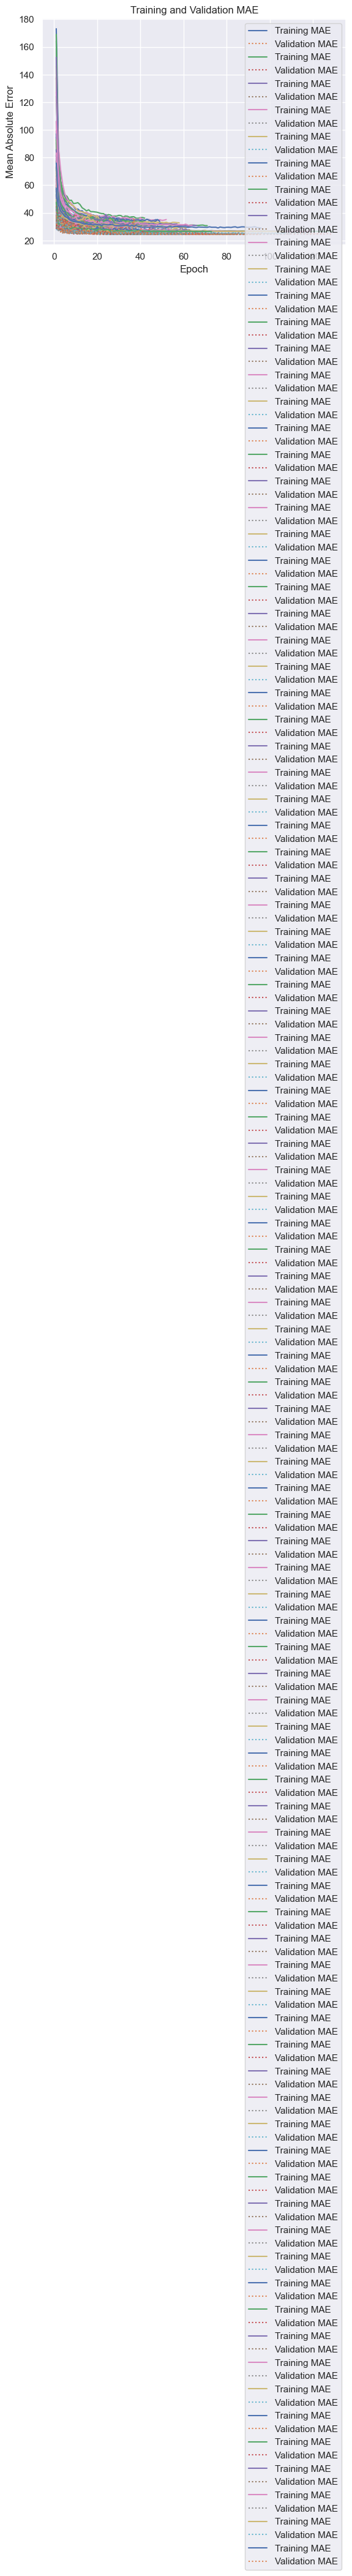

In [201]:

param_grid = {
    'n_layers': [2, 3],
    'n_neurons': [[32, 16], [64, 32], [128, 64, 32]],
    'learning_rate': [0.01, 0.001],
    'patience': [10, 20],
    'dropout_rate': [0, 0.2],
    'l': [0, 0.001],
    'min_lr': [1e-4, 1e-6]
}

import itertools
# Generate all combinations of hyperparameters
param_combinations = list(itertools.product(*param_grid.values()))
results = []

for params in param_combinations:
    param_dict = dict(zip(param_grid.keys(), params))
    print(f"Training with parameters: {param_dict}")
    model, mae, mse, r2 = build_and_train_model(
        n_layers=param_dict['n_layers'],
        n_neurons=param_dict['n_neurons'],
        learning_rate=param_dict['learning_rate'],
        patience=param_dict['patience'],
        dropout_rate=param_dict['dropout_rate'],
        l=param_dict['l'],
        min_lr=param_dict['min_lr'],
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        input_dim=X_train.shape[1]
    )
    results.append((param_dict, mae, mse, r2))
    print(f"Results - MAE: {mae}, MSE: {mse}, R2: {r2}\n")

best_param = min(results, key=lambda x: x[1])  # Minimize MAE
print(f"Best parameters: {best_param[0]}")


In [204]:
best_param = min(results, key=lambda x: x[1])  # Minimize MAE
print(f"Best parameters: {best_param[0]}")

Best parameters: {'n_layers': 2, 'n_neurons': [32, 16], 'learning_rate': 0.001, 'patience': 10, 'dropout_rate': 0, 'l': 0, 'min_lr': 0.0001}



Epoch 39: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 45: ReduceLROnPlateau reducing learning rate to 0.0001.
31/31 [==============================] - 0s 330us/step
Mean Absolute Error: 26.881088256835938
Mean Squared Error: 1227.156494140625
R-squared: 0.9249426126480103


(<keras.src.engine.sequential.Sequential at 0x418a7b9a0>,
 26.881088256835938,
 1227.156494140625,
 0.9249426126480103)

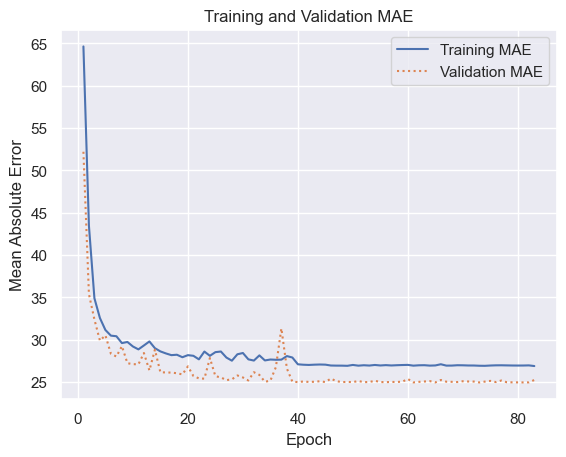

In [205]:
build_and_train_model(n_layers=best_param[0]['n_layers'], n_neurons=best_param[0]['n_neurons'], learning_rate=best_param[0]['learning_rate'], patience=best_param[0]['patience'], dropout_rate=best_param[0]['dropout_rate'], l=best_param[0]['l'], min_lr=best_param[0]['min_lr'], X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, input_dim=X_train.shape[1])

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
mse_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(x):
    X_train_cv, X_val_cv = x.iloc[train_idx], x.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    model_cv = build_model(n_layers=best_param[0]['n_layers'], n_neurons=best_param[0]['n_neurons'], learning_rate=best_param[0]['learning_rate'], dropout_rate=best_param[0]['dropout_rate'], l=best_param[0]['l'], input_dim=X_train_cv.shape[1])

    early_stop = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=5, verbose=0, min_lr=1e-5)

    model_cv.fit(X_train_cv, y_train_cv, validation_data=(X_val_cv, y_val_cv),
                 epochs=200, batch_size=16, callbacks=[early_stop, reduce_lr], verbose=0)

    y_pred_cv = model_cv.predict(X_val_cv)
    mae = np.mean(np.abs(y_val_cv.values - y_pred_cv.flatten()))
    mse = mean_squared_error(y_val_cv, y_pred_cv)
    r2 = r2_score(y_val_cv, y_pred_cv)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

print("KFold MAE scores:", mae_scores)
print("Average MAE:", np.mean(mae_scores))
print("Average MSE:", np.mean(mse_scores))
print("Average R2:", np.mean(r2_scores))

32/32 [==============================] - 0s 2ms/step


32/32 [==============================] - 0s 426us/step


31/31 [==============================] - 0s 449us/step


31/31 [==============================] - 0s 277us/step


31/31 [==============================] - 0s 312us/step
KFold MAE scores: [27.766706834026692, 27.39288993769542, 26.436691591005413, 25.41536709473979, 25.942379429200365]
Average MAE: 26.590806977333536
Average MSE: 1261.4366455078125
Average R2: 0.9256611466407776
